In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
miss_val=["NaN","n/a","na","N/A","NA","Na","nan"]
df=pd.read_csv(r"C:\Users\SMART\Downloads\Wholesale customers data.csv",na_values=miss_val)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Preprocessing

In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


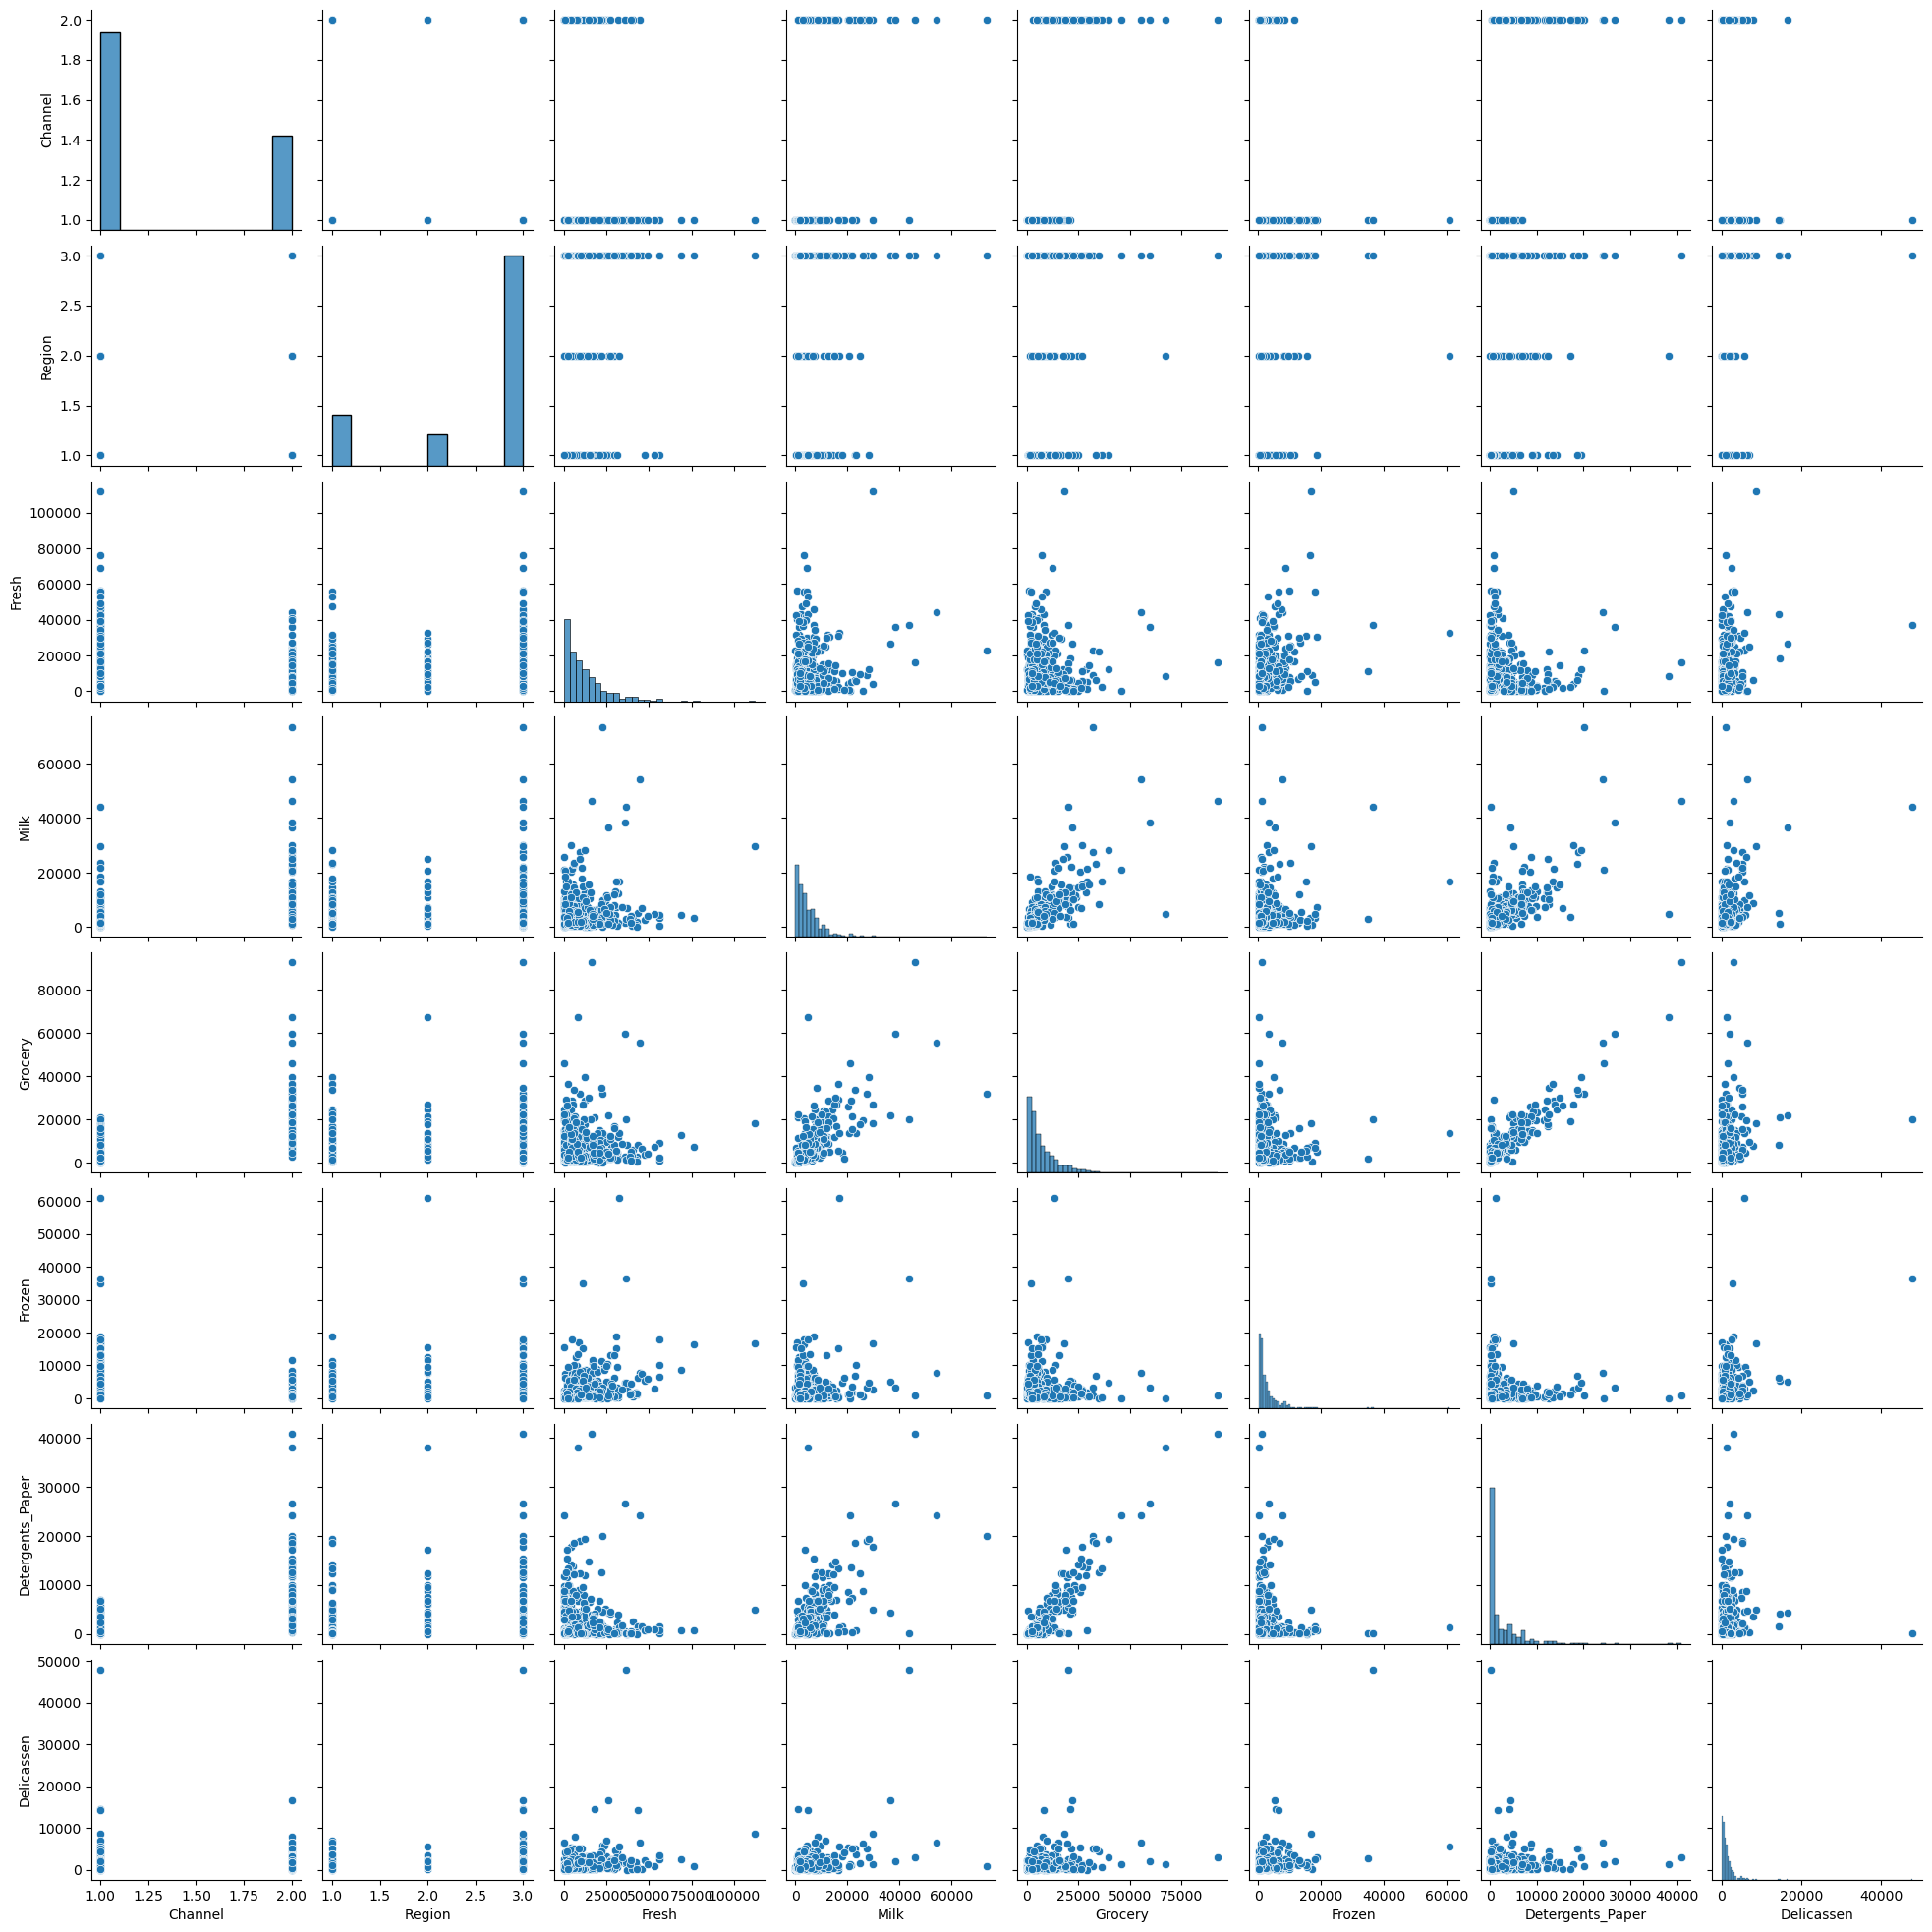

In [7]:
sns.pairplot(df)

In [8]:
df.hist(figsize=(15,10),bins=50);

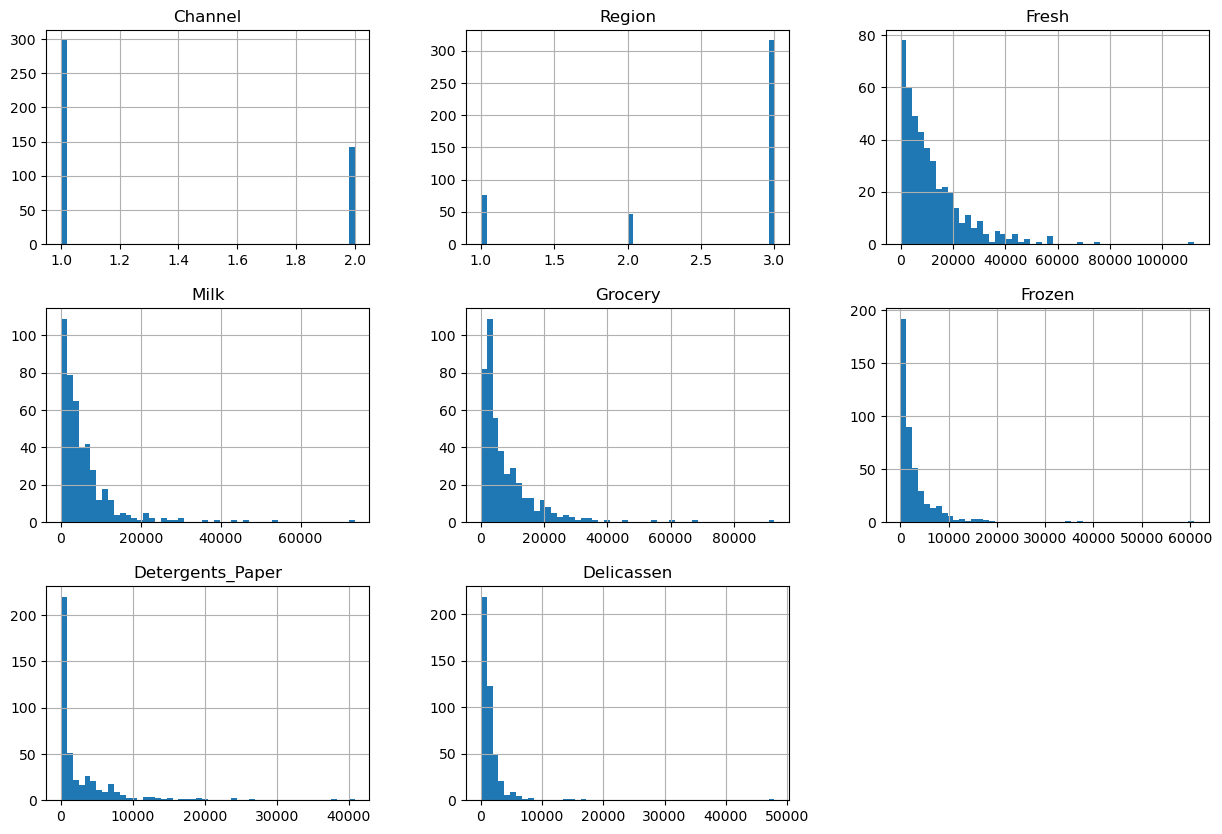

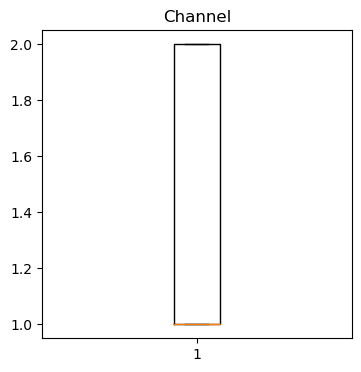

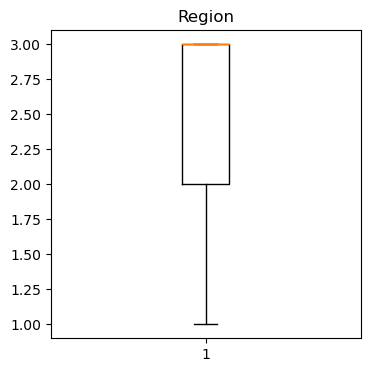

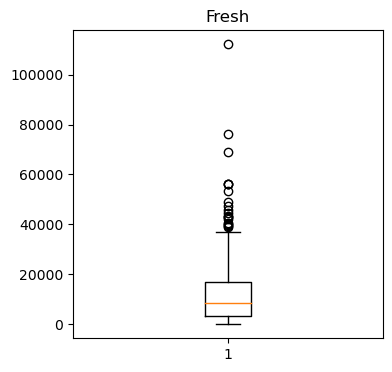

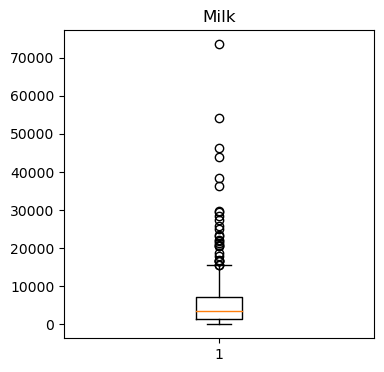

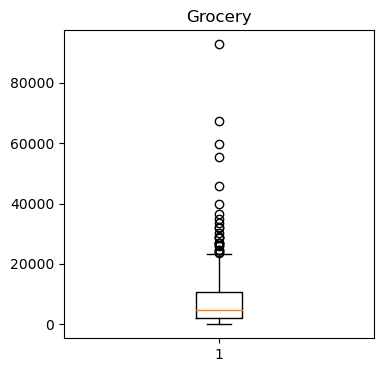

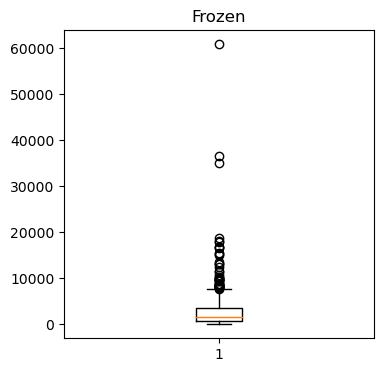

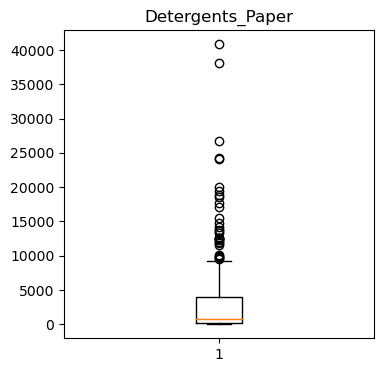

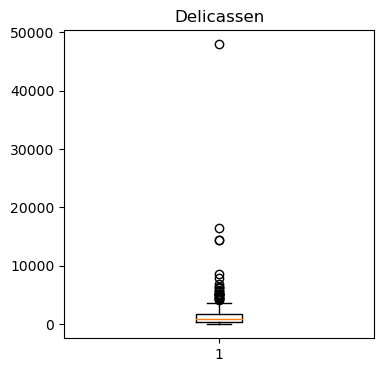

In [9]:
for col in ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(4,4))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [10]:
def limits(data,col):
    Q1=data[col].quantile(.25)
    Q3=data[col].quantile(.75)
    IQR=Q3-Q1
    low_bound=Q1-IQR*1.5
    up_bound=Q3+IQR*1.5
    return low_bound,up_bound

In [11]:
low_Fresh,up_Fresh=limits(df,"Fresh")
filtered_rows_Fresh = df[(df["Fresh"] < low_Fresh) | (df["Fresh"] > up_Fresh)]

In [12]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [13]:
filtered_rows_Fresh.shape

(20, 8)

In [14]:
for x in df["Fresh"]:
    if x < low_Fresh:
        df["Fresh"].replace(x,low_Fresh)
    if x > up_Fresh:
        df["Fresh"].replace(x,up_Fresh)

In [15]:
low_Milk,up_Milk=limits(df,"Milk")
filtered_rows_Milk = df[(df["Milk"] < low_Milk) | (df["Milk"] > up_Milk)]

In [16]:
for x in df["Milk"]:
    if x < low_Milk:
        df["Milk"].replace(x,low_Milk)
    if x > up_Milk:
        df["Milk"].replace(x,up_Milk)

In [17]:
low_Grocery,up_Grocery=limits(df,"Grocery")
filtered_rows_Grocery = df[(df["Grocery"] < low_Grocery) | (df["Grocery"] > up_Grocery)]

In [18]:
filtered_rows_Grocery.shape

(24, 8)

In [19]:
for x in df["Grocery"]:
    if x < low_Grocery:
        df["Grocery"].replace(x,low_Grocery)
    if x > up_Grocery:
        df["Grocery"].replace(x,up_Grocery)

In [20]:
low_Frozen,up_Frozen=limits(df,"Frozen")
filtered_rows_Frozen = df[(df["Frozen"] < low_Frozen) | (df["Frozen"] > up_Frozen)]

In [21]:
filtered_rows_Frozen.shape

(43, 8)

In [22]:
for x in df["Frozen"]:
    if x < low_Frozen:
        df["Frozen"].replace(x,low_Frozen)
    if x > up_Frozen:
        df["Frozen"].replace(x,up_Frozen)

In [23]:
low_Detergents_Paper,up_Detergents_Paper=limits(df,"Detergents_Paper")
filtered_rows_Detergents_Paper = df[(df["Detergents_Paper"] < low_Detergents_Paper) | (df["Detergents_Paper"] > up_Detergents_Paper)]

In [24]:
filtered_rows_Detergents_Paper.shape

(30, 8)

In [25]:
for x in df["Detergents_Paper"]:
    if x < low_Detergents_Paper:
        df["Detergents_Paper"].replace(x,low_Detergents_Paper)
    if x > up_Detergents_Paper:
        df["Detergents_Paper"].replace(x,up_Detergents_Paper)

In [26]:
low_Delicassen,up_Delicassen=limits(df,"Delicassen")
filtered_rows_Delicassen = df[(df["Delicassen"] < low_Delicassen) | (df["Delicassen"] > up_Delicassen)]

In [27]:
filtered_rows_Delicassen.shape

(27, 8)

In [28]:
for x in df["Delicassen"]:
    if x < low_Delicassen:
        df["Delicassen"].replace(x,low_Delicassen)
    if x > up_Delicassen:
        df["Delicassen"].replace(x,up_Delicassen)

In [29]:
df.hist(figsize=(15,10),bins=50);

In [30]:
X=df.copy()

In [31]:
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Clustering

### KMean clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10,init = 'k-means++')
  km.fit(X)
  css=km.inertia_
  wcss.append(css)

In [34]:
wcss

[157595857524.96133,
 113217528878.79834,
 80332414178.02908,
 64855545845.90139,
 52928149261.51565,
 47351898310.72066,
 41233923256.64024,
 36161149963.273636,
 33408485875.39413,
 30073440349.762257]

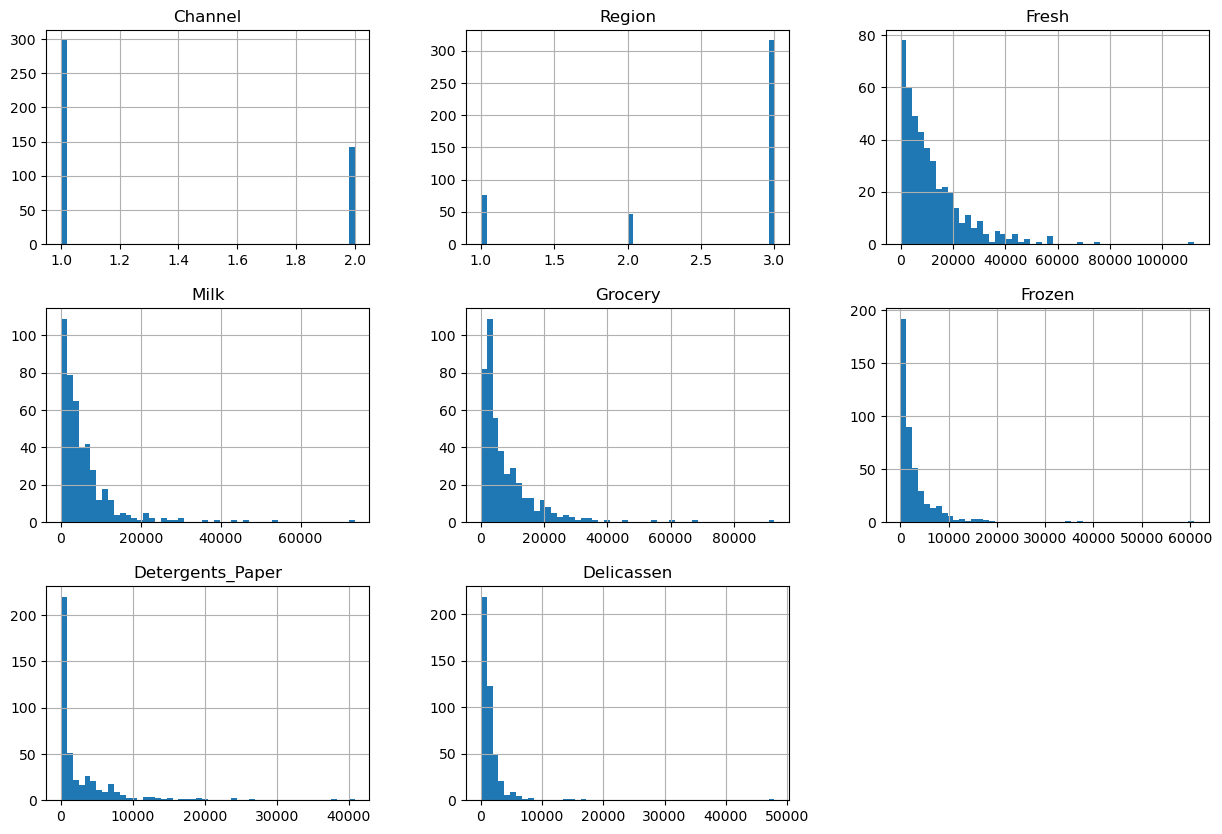

In [35]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')
plt.show()

In [36]:
km=KMeans(n_clusters=5,n_init=10,init = 'k-means++')

In [37]:
km.fit(X)

KMeans(n_clusters=5)

In [38]:
cluster_labels=km.predict(X)

In [39]:
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 4, 1, 0, 1, 1, 0, 0, 1, 2, 2, 4, 1, 1, 2, 2,
       0, 2, 2, 3, 0, 2, 0, 0, 4, 2, 1, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 3,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 3, 3, 4,
       0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 1, 2, 2, 0, 2,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 4, 1, 1, 0, 4, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       4, 0, 0, 0, 0, 4, 2, 4, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3, 0, 0, 2, 2, 2, 1, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 4, 1, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 4, 4, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 1, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 4, 1, 4, 4,
       0, 1, 1, 4, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,

In [40]:
pd.Series(cluster_labels).value_counts()

0    226
1    103
2     81
4     23
3      7
dtype: int64

In [41]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

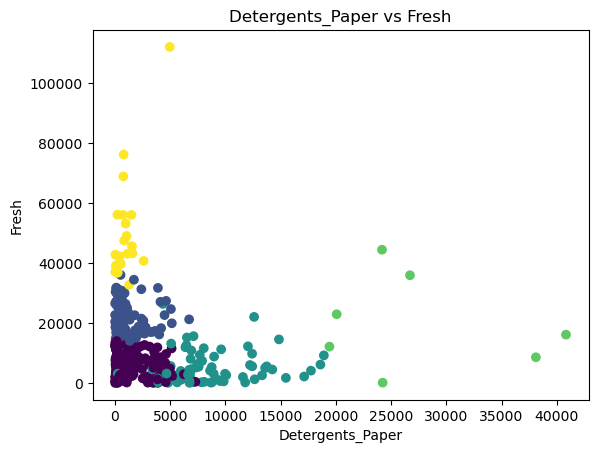

In [77]:
plt.scatter(X['Detergents_Paper'],X['Fresh'],c = cluster_labels)
plt.xlabel('Detergents_Paper')
plt.ylabel('Fresh')
plt.title('Detergents_Paper vs Fresh')
plt.show()

### Agglomerative Hierarchical Clustering (AHC)

In [43]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [44]:
merging=linkage(X,method='ward')

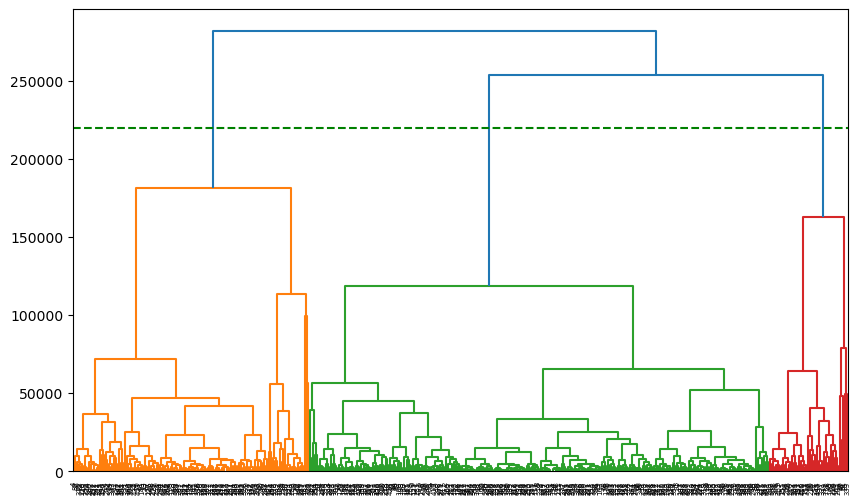

In [45]:
plt.figure(figsize=(10,6))
dendrogram(merging)
plt.axhline(220000,color="green",linestyle='dashed')
plt.show()

In [46]:
cluster_labels_hc = fcluster(merging,200000,criterion = 'distance')

In [47]:
cluster_labels_hc

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

In [48]:
pd.Series(cluster_labels_hc).value_counts()

2    261
1    134
3     45
dtype: int64

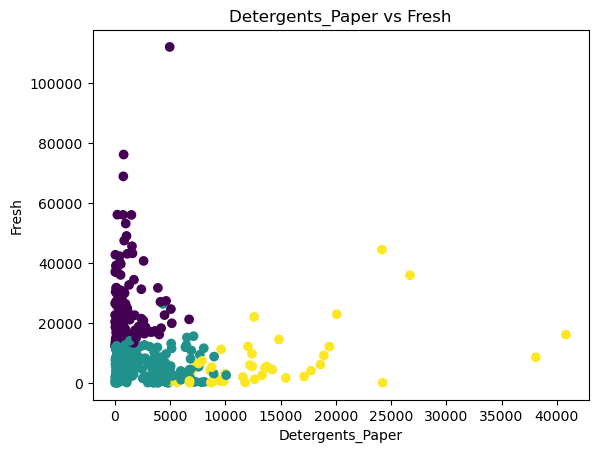

In [78]:
plt.scatter(X['Detergents_Paper'],X['Fresh'],c = cluster_labels_hc)
plt.xlabel('Detergents_Paper')
plt.ylabel('Fresh')
plt.title('Detergents_Paper vs Fresh')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
sil_score_hc = silhouette_score(X,cluster_labels_hc)
sil_score_hc

0.3750155190004844

In [52]:
sil_score = silhouette_score(X,cluster_labels)
sil_score

0.37183784373404916

### DB Scan

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
dbs=DBSCAN(eps=3,min_samples=5)

In [55]:
model=dbs.fit(X)

In [56]:
labels=model.labels_

In [57]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [58]:
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbs.core_sample_indices_]=True 

In [59]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
n_clusters

0

In [60]:
df.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [61]:
from sklearn.preprocessing import scale

In [62]:
x=pd.DataFrame(scale(df),columns=df.columns)

In [63]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca=PCA(n_components=3)

In [66]:
pc_array=pca.fit_transform(x)

In [67]:
pc_array.shape

(440, 3)

In [68]:
pc_df=pd.DataFrame(pca.fit_transform(x), columns=['pc1','pc2','pc3'])

In [69]:
pca.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 ])

In [70]:
pca.explained_variance_ratio_*100

array([38.75012291, 22.37458795, 12.64717345])

In [71]:
pc_df.corr().round()

,pc1,pc2,pc3
pc1,1.0,-0.0,-0.0
pc2,-0.0,1.0,0.0
pc3,-0.0,0.0,1.0


In [72]:
model1=dbs.fit(pc_df)

In [73]:
labels_pca=model1.labels_

In [74]:
labels_pca

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [75]:
n_clusters_pca=len(set(labels_pca))- (1 if -1 in labels_pca else 0)
n_clusters_pca

1

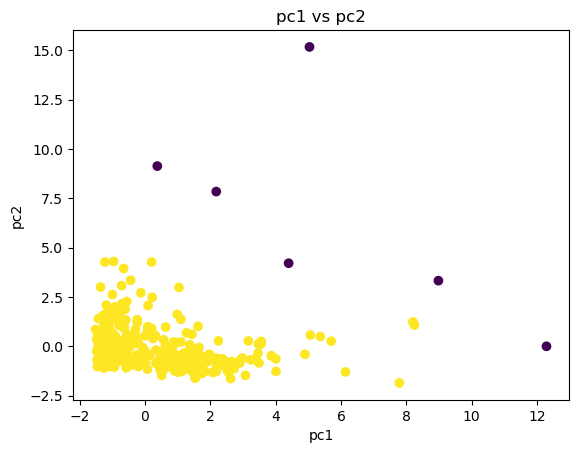

In [76]:
plt.scatter(pc_df['pc1'],pc_df['pc2'],c = labels_pca)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pc1 vs pc2')
plt.show()